In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


## Load data

In [2]:
data=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: ylabel='count'>

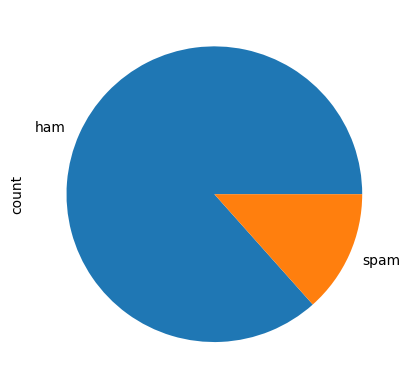

In [4]:
data["v1"].value_counts().plot(kind="pie")

## Vectorize text and encode labels

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

label_encoder=LabelEncoder()
Text_vectorizer=TfidfVectorizer()

X=Text_vectorizer.fit_transform(data["v2"])
y=label_encoder.fit_transform(data["v1"])

## Create train and test splits

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB

model_1=MultinomialNB()
model_1.fit(X_train, y_train)

MultinomialNB()

In [11]:
from sklearn.metrics import accuracy_score

model_1_preds=model_1.predict(X_test)
model_1_accuracy=accuracy_score(y_test, model_1_preds)
print(f"model 1 test accuracy: {model_1_accuracy}")

model 1 test accuracy: 0.9623318385650225


## Model 2: Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

model_2=LogisticRegression()
model_2.fit(X_train, y_train)

LogisticRegression()

In [15]:
model_2_preds=model_2.predict(X_test)
model_2_accuracy=accuracy_score(y_test, model_2_preds)
print(f"model 2 test accuracy: {model_2_accuracy}")

model 2 test accuracy: 0.9623318385650225


## Model 3: SVM

In [16]:
from sklearn.svm import LinearSVC

model_3=LinearSVC()
model_3.fit(X_train, y_train)

LinearSVC()

In [17]:
model_3_preds=model_3.predict(X_test)
model_3_accuracy=accuracy_score(y_test, model_3_preds)
print(f"model 3 test accuracy: {model_3_accuracy}")

model 3 test accuracy: 0.9802690582959641


## Compare Results

In [26]:
# Combine model results into a dataframe
combined_results = pd.DataFrame({"Model 1 (Tfidf Naive Bayes)": [model_1_accuracy],
                                  "Model 2 (Logistic Regression)": [model_2_accuracy],
                                  "Model 3 (SVC)": [model_3_accuracy]})
combined_results = combined_results.transpose()
combined_results.rename(columns={0:'Accuracy'}, inplace = True)
combined_results

,Accuracy
Model 1 (Tfidf Naive Bayes),0.962332
Model 2 (Logistic Regression),0.962332
Model 3 (SVC),0.980269


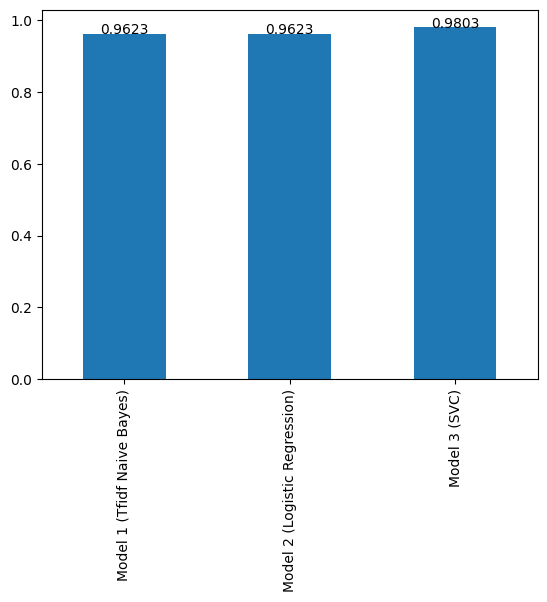

In [33]:
ax=combined_results.plot(kind='bar', legend=False)
for i, v in enumerate(combined_results['Accuracy']):
    ax.text(i, v, '%.4f' %float(v), color='black', ha='center')